In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Turn project folder into path

path = r'/Users/lucerovargas/Documents/Data Analysis/Achievement 4- Python Fundamentals/12.2022 Instacart Basket Analysis'

In [3]:
# Import data frame 'df_merge.pkl' into Jupyter dataframe

df_merge = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'df_merge.pkl'))

In [4]:
df_merge['frequency_flag'].value_counts(dropna = False)

Frequent customer        21559853
Regular customer          7208564
Non-frequent customer     3636437
NaN                             5
Name: frequency_flag, dtype: int64

In [4]:
# Review dataframe 

df_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,date_joined,n_dependants,Marital Status,income,region,exclusion flag,age_flag,income_flag,department,family_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,2/17/2019,3,married,40423,Southeast,high-activity,Millennials,Lower Middle Class,beverages,family


In [5]:
df_merge.shape

(32404859, 35)

In [6]:
df_merge.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_days',
       'busiest_hours', 'max_order', 'loyalty_flag', 'average_price_spent',
       'spending_flag', 'frequent_customers', 'frequency_flag', 'Gender',
       'State', 'Age', 'date_joined', 'n_dependants', 'Marital Status',
       'income', 'region', 'exclusion flag', 'age_flag', 'income_flag',
       'department', 'family_flag'],
      dtype='object')

### 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [7]:
# create days column with name for customer-profile

df_merge.loc[df_merge['orders_day_of_week'] == 0, 'day_of_week'] = 'saturday'

In [8]:
df_merge.loc[df_merge['orders_day_of_week'] == 1, 'day_of_week'] = 'sunday'

In [9]:
df_merge.loc[df_merge['orders_day_of_week'] == 2, 'day_of_week'] = 'monday'

In [10]:
df_merge.loc[df_merge['orders_day_of_week'] == 3, 'day_of_week'] = 'tuesday'

In [11]:
df_merge.loc[df_merge['orders_day_of_week'] == 4, 'day_of_week'] = 'wednesday'

In [12]:
df_merge.loc[df_merge['orders_day_of_week'] == 5, 'day_of_week'] = 'thursday'

In [13]:
df_merge.loc[df_merge['orders_day_of_week'] == 6, 'day_of_week'] = 'friday'

<AxesSubplot:>

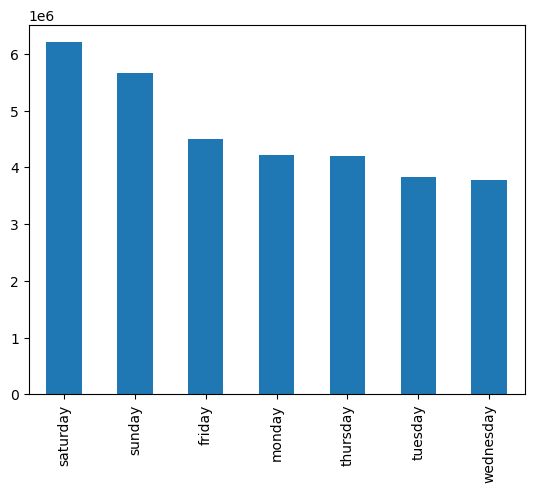

In [14]:
# Review which days of weeks are busiest per value counts

df_merge['day_of_week'].value_counts().plot.bar()

The weekend is the busiest days for orders, with Saturday taking lead

** **
                                    USAGE FREQUENCY

In [15]:
# Age Profile Usage Frequency Aggregation

df_merge.groupby('age_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                              mean  min   max
age_flag                                     
Boomers I                11.063289  0.0  30.0
Boomers II               11.130406  0.0  30.0
Gen X                    11.108122  0.0  30.0
Gen Z                    11.106596  0.0  30.0
Millennials              11.110451  0.0  30.0
Post War                 11.083733  0.0  30.0

In [16]:
# Income Profile Usage Frequency Aggregation

df_merge.groupby('income_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                     mean  min   max
income_flag                                         
Low Class                       11.775951  0.0  30.0
Lower Middle Class              11.506534  0.0  30.0
Middle Class                    11.050339  0.0  30.0
Upper-Middle Class              11.026307  0.0  30.0
Wealthy Class                   10.551896  0.0  30.0

In [17]:
# Family Status Profile Usage Frequency Aggregration

df_merge.groupby('family_flag').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                                   mean  min   max
family_flag                                       
family                        11.127201  0.0  30.0
family with baby               9.963975  0.0  30.0
single adult                  11.080805  0.0  30.0

In [18]:
# Gender Status Profile Usage Frequency Aggregration

df_merge.groupby('Gender').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                         mean  min   max
Gender                                  
Female              11.085142  0.0  30.0
Male                11.122757  0.0  30.0

In [19]:
# Region Status Profile Usage Frequency Aggregration

df_merge.groupby('region').agg({'days_since_prior_order':['mean', 'min', 'max']})

days_since_prior_order           
                            mean  min   max
region                                     
Midwest                11.181836  0.0  30.0
Northeast              11.075769  0.0  30.0
Southeast              11.130809  0.0  30.0
Southwest              10.931548  0.0  30.0
West                   11.070712  0.0  30.0

** **
                                        EXPENDITURE

In [20]:
# Age Profile Expenditure Frequency Aggregation

df_merge.groupby('age_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                 mean  min   max
age_flag                        
Boomers I    7.792354  1.0  25.0
Boomers II   7.797106  1.0  25.0
Gen X        7.790338  1.0  25.0
Gen Z        7.785156  1.0  25.0
Millennials  7.788922  1.0  25.0
Post War     7.796923  1.0  25.0

In [21]:
# Income Profile Expenditure Frequency Aggregation

df_merge.groupby('income_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                        mean  min   max
income_flag                            
Low Class           6.499623  1.0  25.0
Lower Middle Class  6.869666  1.0  25.0
Middle Class        7.921966  1.0  25.0
Upper-Middle Class  7.958847  1.0  25.0
Wealthy Class       7.755069  1.0  25.0

In [22]:
# Family Status Profile Expenditure Frequency Aggregration

df_merge.groupby('family_flag').agg({'prices':['mean', 'min', 'max']})

prices           
                      mean  min   max
family_flag                          
family            7.793194  1.0  25.0
family with baby  7.650679  1.0  15.0
single adult      7.789975  1.0  25.0

In [23]:
# Gender Status Profile Expenditure Frequency Aggregration

df_merge.groupby('Gender').agg({'prices':['mean', 'min', 'max']})

prices           
            mean  min   max
Gender                     
Female  7.788651  1.0  25.0
Male    7.793305  1.0  25.0

In [24]:
# Region Status Profile Usage Frequency Aggregration

df_merge.groupby('region').agg({'prices':['mean', 'min', 'max']})

prices           
               mean  min   max
region                        
Midwest    7.792584  1.0  25.0
Northeast  7.782409  1.0  25.0
Southeast  7.795318  1.0  25.0
Southwest  7.790085  1.0  25.0
West       7.790755  1.0  25.0

### 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

** **
                                        REGIONS

In [26]:
pd.crosstab(df_merge['age_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,Southeast,Southwest,West
age_flag,,,,,
Boomers I,1048924,810549,1328147,345048,1011058
Boomers II,1161415,896037,1465770,390135,1063087
Gen X,1955362,1446035,2351145,662274,1768243
Gen Z,1050431,798828,1367578,371624,969541
Millennials,1904632,1408781,2386466,650377,1743789
Post War,476561,362506,600646,181133,428737


In [27]:
pd.crosstab(df_merge['income_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,Southeast,Southwest,West
income_flag,,,,,
Low Class,125524,85790,161201,46101,105137
Lower Middle Class,874646,677921,1109336,301050,801280
Middle Class,3529522,2669813,4501581,1210317,3335124
Upper-Middle Class,3048073,2279438,3715176,1039537,2729304
Wealthy Class,19560,9774,12458,3586,13610


In [28]:
pd.crosstab(df_merge['family_flag'], df_merge['region'], dropna = False)

region,Midwest,Northeast,Southeast,Southwest,West
family_flag,,,,,
family,5618531,4247814,7045888,1880831,5196984
family with baby,73594,56621,93046,26181,67866
single adult,1905200,1418301,2360818,693579,1719605


In [30]:
pd.crosstab(df_merge['Gender'], df_merge['region'], dropna = False)

region,Midwest,Northeast,Southeast,Southwest,West
Gender,,,,,
Female,3806645,2763944,4735330,1285569,3498342
Male,3790680,2958792,4764422,1315022,3486113


** **
                                        DEPARTMENTS

In [31]:
pd.crosstab(df_merge['age_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
age_flag,,,,,,,,,,,,,,,,,,,,,
Boomers I,21377,58915,164275,382950,98150,4755,147675,762572,147439,120847,...,104746,37171,99534,9535,4841,262652,61984,13532,1324441,402860
Boomers II,22912,63990,179709,414329,106685,5235,165013,822752,162919,133162,...,113160,41142,109521,10675,5742,290675,69321,15053,1458115,440301
Gen X,38919,109160,297051,682407,178467,8670,269141,1358286,264031,219337,...,186452,67758,178647,17355,9224,474679,114399,24643,2387537,731110
Gen Z,23046,60810,165291,375524,100590,4964,150872,762535,147714,123061,...,102915,38403,99758,10133,5271,263707,62870,14775,1326518,405955
Millennials,38382,105065,292275,663076,174820,8656,267674,1355634,263283,215440,...,184227,67710,175349,17154,8999,465563,111028,23390,2378835,723638
Post War,9060,25862,73827,169837,44321,2293,67683,336968,65863,54780,...,47166,17069,46118,4293,2214,118093,27970,6323,603845,183686


In [32]:
pd.crosstab(df_merge['income_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
income_flag,,,,,,,,,,,,,,,,,,,,,
Low Class,2878,3683,16419,61760,14301,764,12055,75725,17200,9850,...,13785,3533,4183,1033,690,25049,7301,1194,124709,93485
Lower Middle Class,19734,35918,122305,406017,99109,4914,95896,571357,119351,78705,...,95978,25289,45453,7759,4212,192453,54020,10257,954103,575049
Middle Class,66719,211287,556619,1200438,319703,16382,516651,2572762,496668,421020,...,335047,131519,353891,33173,16951,892255,209444,45563,4573227,1222115
Upper-Middle Class,62494,172451,474464,1014290,268587,12509,441255,2168955,416444,355261,...,290961,108388,303995,27119,14331,761921,175909,40222,3815296,991567
Wealthy Class,1871,463,2621,5618,1333,4,2201,9948,1586,1791,...,2895,524,1405,61,107,3691,898,480,11956,5334


In [33]:
pd.crosstab(df_merge['family_flag'], df_merge['department'], dropna = False)

department,alcohol,babies,bakery,beverages,breakfast,bulk,canned goods,dairy eggs,deli,dry goods pasta,...,household,international,meat seafood,missing,other,pantry,personal care,pets,produce,snacks
family_flag,,,,,,,,,,,,,,,,,,,,,
family,114578,0,878023,2013681,528456,26295,803220,4049385,786104,651365,...,557893,201540,534843,52057,27116,1408612,335566,73133,7103846,2166752
family with baby,0,317308,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
single adult,39118,106494,294405,674442,174577,8278,264838,1349362,265145,215262,...,180773,67713,174084,17088,9175,466757,112006,24583,2375445,720798
